In [62]:
from rdflib import Graph, URIRef, Literal
from rdflib.namespace import PROV, RDFS, SDO, RDF, SKOS, XSD
from rdflib.namespace import Namespace
from rdflib.tools.rdf2dot import rdf2dot

from IPython.display import display, Image
import pydotplus
import io

g = Graph()

DQV = Namespace("http://www.w3.org/ns/dqv#")
g.bind("dqv", DQV)

# define subjects
worker = URIRef(":worker")
iq_assessment = URIRef(":iq_assessment")
target_item = URIRef(":target_item")

# add triples starting from worker
g.add((worker, RDFS.subClassOf, SDO.Person))

# add triples starting from assessment
g.add((iq_assessment, RDFS.subClassOf, DQV.QualityMeasurement))
g.add((iq_assessment, PROV.wasAttributedTo, worker))
g.add((iq_assessment, DQV.computedOn, target_item))

# add triples pointing to assessment
g.add((DQV.dimension, DQV.inDimension, iq_assessment))
g.add((DQV.metric, DQV.isMeasurementOf, iq_assessment))
g.add((target_item, DQV.hasQualityMeasurement, iq_assessment))

# add triples starting from target item
g.add((target_item, RDFS.subClassOf, SDO.DigitalDocument))

# sample dimension
correctness = URIRef(":correctness")
g.add((correctness, RDF.type, DQV.dimension))
g.add((correctness, RDFS.label, Literal("Correctness", lang="en")))
g.add((correctness, RDFS.Datatype, XSD.integer))

# sample property of worker


print(g.serialize())


@prefix dqv: <http://www.w3.org/ns/dqv#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<:correctness> a dqv:dimension ;
    rdfs:label "Correctness"@en ;
    rdfs:Datatype xsd:integer .

dqv:metric dqv:isMeasurementOf <:iq_assessment> .

<:target_item> rdfs:subClassOf schema:DigitalDocument ;
    dqv:hasQualityMeasurement <:iq_assessment> .

<:worker> rdfs:subClassOf schema:Person .

dqv:dimension dqv:inDimension <:iq_assessment> .

<:iq_assessment> rdfs:subClassOf dqv:QualityMeasurement ;
    dqv:computedOn <:target_item> ;
    prov:wasAttributedTo <:worker> .




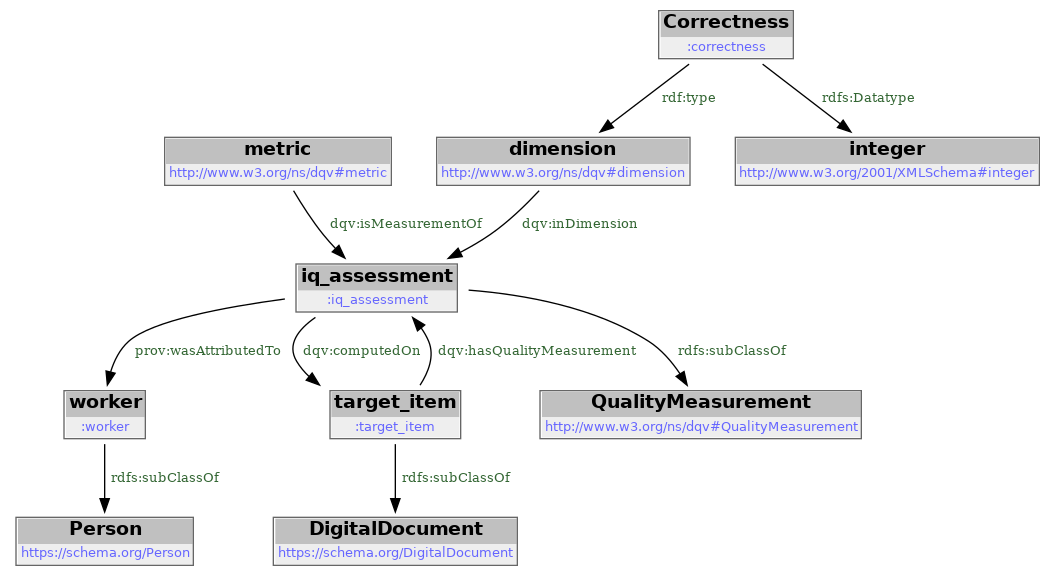

In [59]:
stream = io.StringIO()
rdf2dot(g, stream, opts={display})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()
display(Image(png))

In [61]:
# quering with SPARQL
q = """
    SELECT ?a
    WHERE {
        ?a rdf:type dqv:dimension .
    }
"""

q_result = g.query(q)
for r in q_result:
    print("Label: ", g.value(r[0], RDFS.label))
    print("DType: ", g.value(r[0], RDFS.Datatype))

Label:  Correctness
DType:  http://www.w3.org/2001/XMLSchema#integer


Metadata (properties) of describing features as resource:
- name
- class
- datatype
- valid range